## 1.
Si $x_0=3$ y
$$x_n = (5x_{n-1}+7) \mod 200$$

**a)** encuentre $x_1,...,x_{100}$

In [1]:
def CongruencialMixto(x, a, m, c):
    lista=[]
    cont=0
    print("\n| n: 0 |","Xn:",x,"| --------- |")
    for i in range(100):
        lista.append(x) 
        x=(a * x + c) % m
        u=x/m
        cont+=1
        print ("| n: %d | Xn: %d | Un: %s |" %(cont,x,u))
    return lista


x = 3
a = 5
c = 7
m = 200
listaDatos = CongruencialMixto(x, a, m, c)



| n: 0 | Xn: 3 | --------- |
| n: 1 | Xn: 22 | Un: 0.11 |
| n: 2 | Xn: 117 | Un: 0.585 |
| n: 3 | Xn: 192 | Un: 0.96 |
| n: 4 | Xn: 167 | Un: 0.835 |
| n: 5 | Xn: 42 | Un: 0.21 |
| n: 6 | Xn: 17 | Un: 0.085 |
| n: 7 | Xn: 92 | Un: 0.46 |
| n: 8 | Xn: 67 | Un: 0.335 |
| n: 9 | Xn: 142 | Un: 0.71 |
| n: 10 | Xn: 117 | Un: 0.585 |
| n: 11 | Xn: 192 | Un: 0.96 |
| n: 12 | Xn: 167 | Un: 0.835 |
| n: 13 | Xn: 42 | Un: 0.21 |
| n: 14 | Xn: 17 | Un: 0.085 |
| n: 15 | Xn: 92 | Un: 0.46 |
| n: 16 | Xn: 67 | Un: 0.335 |
| n: 17 | Xn: 142 | Un: 0.71 |
| n: 18 | Xn: 117 | Un: 0.585 |
| n: 19 | Xn: 192 | Un: 0.96 |
| n: 20 | Xn: 167 | Un: 0.835 |
| n: 21 | Xn: 42 | Un: 0.21 |
| n: 22 | Xn: 17 | Un: 0.085 |
| n: 23 | Xn: 92 | Un: 0.46 |
| n: 24 | Xn: 67 | Un: 0.335 |
| n: 25 | Xn: 142 | Un: 0.71 |
| n: 26 | Xn: 117 | Un: 0.585 |
| n: 27 | Xn: 192 | Un: 0.96 |
| n: 28 | Xn: 167 | Un: 0.835 |
| n: 29 | Xn: 42 | Un: 0.21 |
| n: 30 | Xn: 17 | Un: 0.085 |
| n: 31 | Xn: 92 | Un: 0.46 |
| n: 32 | Xn: 67 | 

**b)** el tamaño del ciclo (si lo tiene)

In [2]:
# ---------------- Metodo para saber el ciclo ------------------------
def ciclos(lista):
    for i in range(len(lista)):
        for j in range(i+1, len(lista)):
            if lista[i]==lista[j]:
                return print ("\nEl tamaño del ciclo es",j-i)
    return "No se repite"

ciclos(listaDatos)


El tamaño del ciclo es 8


**c)** calcule el estadístico $\chi^2$

In [3]:
import numpy as np

def congruencial_mixto(N):
    x = 3
    a = 5
    c = 7
    m = 200

    lista=[]
    for i in range(N):
        x=(a * x + c) % m
        u=x/m
        lista.append(u) 
    return (lista)  

def chi_2(k,congruencial_mixto):
    frecuenciaEsperada=len(congruencial_mixto)/k
    frecuenciaObservada=[0]*k
    numIntervalos=1/k
    Valor=0
    
    for i in range(len(congruencial_mixto)):
        for j in range(k):
            if congruencial_mixto[i]>j*numIntervalos and congruencial_mixto[i]<=(j+1)*numIntervalos:
                frecuenciaObservada[j]+=1
                
    for k in range(k):
        Valor+=((frecuenciaObservada[k]-frecuenciaEsperada)**2)/frecuenciaEsperada
    
    return print ("El valor de chi^2 es: ",Valor)
    
    
chi_2(10,congruencial_mixto(100))

El valor de chi^2 es:  22.799999999999997


## 2.

Dada la función $f(x) = -4x^6 + 5x^2 - x + 1$:

**a)** Calcule el área bajo la curva usando el método de Monte Carlo generando 1.000 y 1.000.000 puntos $(x,y)$ aleatorios. Para ello use sus propios generadores congruenciales de numeros pseudoaleatorios uniformes $U(0,1)$, tal que genere puntos $(x,y)$ para el rango $x = [-1,1]$ y $y =[0,max(f(x))]$.<br>
**b)** Grafique la función y los puntos $(x,y)$ aleatorios generados.<br>
**c)** Calcule el error en comparación con el valor de la solución analítica.

Generando 1000 

a) Area bajo la curva = 4.189143240182

Solución analítica



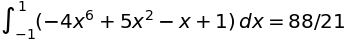

In [14]:
%matplotlib inline 

import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy import init_printing

def f(x):
    return -4*math.pow(x,6)+5*math.pow(x,2)-x+1

xmin = -1.0
xmax = 1.0


numPasos = 100000 
ymin = 0
ymax = ymin
for i in range(numPasos):
    x = xmin + (xmax - xmin) * float(i) / numPasos
    y = f(x)
    if y < ymin: ymin = y
    if y > ymax: ymax = y

        
def congruencial_mixto(k):
    x = int(random.uniform(1,100))
    a = 25214903917 
    c = 11
    mod = (2 ** 48) - 1

    lista=[]
    cont=0
    while cont<k:
        x=(a * x + c) % mod
        u=x/mod
        lista.append(u) 
        cont+=1
    return (lista) 

# Monte Carlo
rectArea = (xmax - xmin) * (ymax - ymin)
numPuntos = 1000
ct = 0

Xr=[]
Yr=[]
Xb=[]
Yb=[]

for j in range(numPuntos):
    u1= congruencial_mixto(numPuntos)
    u2= congruencial_mixto(numPuntos)
    
    x = xmin + (xmax - xmin) * u1[j]
    y = ymin + (ymax - ymin) * u2[j]
    if x>=-1 and x<=1 and y <= f(x):
        ct += 1
        Xr.append(x)
        Yr.append(y)
    else:
        Xb.append(x)
        Yb.append(y)

AreaBajoCurva = rectArea * float(ct) / numPuntos
print("Generando 1000 \n")
print("a) Area bajo la curva = " + str(AreaBajoCurva))


print("\nSolución analítica\n")
init_printing() 
x = Symbol('x')
aa=Integral((-4*x**6+5*x**2 - x + 1), (x, -1, 1))
Eq(aa, aa.doit())


In [15]:
print("c) Error",88/21-AreaBajoCurva)

c) Error 0.0013329502941905602



b) Grafica



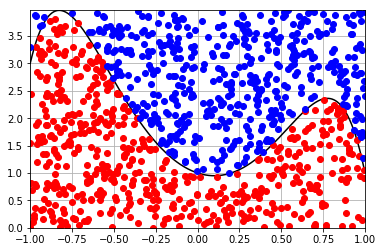

In [16]:
print("\nb) Grafica\n")
xx = np.arange(xmin,xmax,(xmax-xmin)/1000)
yy=[]

for xi in xx:
    yy.append(f(xi))
plt.plot(xx,yy,color="black")
plt.plot(Xr, Yr, color="red",linewidth=0, marker='o', lw=1 )
plt.plot(Xb, Yb, color="blue",linewidth=0, marker='o', lw=1 )

plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.grid(True) 
plt.show()


In [8]:
%matplotlib inline 

import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy import init_printing

def f(x):
    return -4*math.pow(x,6)+5*math.pow(x,2)-x+1

xmin = -1.0
xmax = 1.0

numPasos = 100000 
ymin = 0
ymax = ymin
for i in range(numPasos):
    x = xmin + (xmax - xmin) * float(i) / numPasos
    y = f(x)
    if y < ymin: ymin = y
    if y > ymax: ymax = y
        
def congruencial_mixto(k):
    x = int(random.uniform(1,100))
    a = 25214903917 
    c = 11
    mod = (2 ** 48) - 1

    lista=[]
    cont=0
    while cont<k:
        x=(a * x + c) % mod
        u=x/mod
        lista.append(u) 
        cont+=1
    return (lista) 

# Monte Carlo
rectArea = (xmax - xmin) * (ymax - ymin)
numPuntos = 1000000
ct = 0

Xr=[]
Yr=[]
Xb=[]
Yb=[]

for j in range(numPuntos):
    #u1= congruencial_mixto(numPuntos)
    #u2= congruencial_mixto(numPuntos)
    
    x = xmin + (xmax - xmin) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if x>=-1 and x<=1 and y <= f(x):
        ct += 1
        Xr.append(x)
        Yr.append(y)
    else:
        Xb.append(x)
        Yb.append(y)

AreaBajoCurva = rectArea * float(ct) / numPuntos
print("Generando 1.000.000 \n")
print("a) Area bajo la curva = " + str(AreaBajoCurva))


Generando 1.000.000 

a) Area bajo la curva = 4.189896968605897


In [6]:
print("c) Error",abs(88/21-AreaBajoCurva))

c) Error 0.002316764236960367



b) Grafica



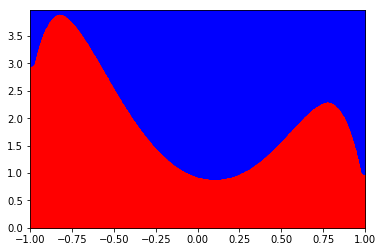

In [9]:
print("\nb) Grafica\n")
xx = np.arange(xmin,xmax,(xmax-xmin)/1000000)
yy=[]

for xi in xx:
    yy.append(f(xi))
plt.plot(xx,yy,color="black")
plt.plot(Xr, Yr, color="red",linewidth=0, marker='o', lw=1 )
plt.plot(Xb, Yb, color="blue",linewidth=0, marker='o', lw=1 )

plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.grid(True) 
plt.show()

## 3.
Escriba un programa para generar $n$ valores a partir de la funcion de masa de probabilidad $p_1 = 1/4$ para $x_1$, y $p_2 = 3/4$ para $x_2$ <br>
**a)** Sea $n = 100$, ejecute el programa y determine la proporcion de valores que sean iguales a 2.<br>
**b)** Repita (a) con $n = 1000$.<br>
**c)** Repita (a) con $n = 10000$.

## 4. 
Se tiene un sistema de línea de espera con un servidor y capacidad infinita (Modelo de Colas G/G/1) (Ver [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ), en el cual tanto los tiempos de llegada entre clientes, así como los tiempos de atención del servidor se comportan como  variables aleatorias generadas de distribuciones de probabilidad exponenciales, en donde en promedio llegan A clientes por minuto al sistema y el servidor atiende en promedio B clientes por minuto. La simulación inicia en el tiempo $t=0$ y se deja de permitir el ingreso de mas clientes en el sistema en el tiempo $T=100$.

Para analizar el sistema Ud. debe usar la implementación de acuerdo con el Modelo de Colas G/G/1 visto en clase (diapositivas 42 y 43 [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ). 

Para la generación de las variables aleatorias con distribución exponencial debe usar el método de la inversión para variables aleatorias continuas usando generadores congruenciales mixtos. _Ayuda: El método de inversión para variables aleatorias continuas debe usar la función inversa $F^{-1}(p)$ de la distribución de probabilidad acumulada de la distribución exponencial en donde el valor $p$ proviene del generador congruencial mixto_.

Para la generación de las variables aleatorias de los tiempos entre las llegadas de clientes (variable aleatoria $X$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = A$ a partir de un generador congruencial _Numerical Recipes_ (i.e. $a = 1664525$, $c = 1013904223$, $m=2^{32}$) y semilla $X_0 = 987654321$.

Para la generación de las variables aleatorias de los tiempos de atención del servidor (variable aleatoria $Y$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = B$ a partir de un generador congruencial Turbo Pascal (i.e. $a = 134775813$, $c = 1$, $m=2^{32}$) y semilla $X_0 = 123456789$.

Con su implementación para $A=2.5$ y $B=6$ por favor responda lo siguiente:

**a)** Tiempo promedio de los clientes en el sistema.

**b)** Tiempo promedio de los clientes en la cola.

**c)** Tiempo transcurrido desde $T$ hasta que el último cliente abandona el sistema.

**d)** Número máximo de clientes en el sistema durante la simulación.

**e)** Total de clientes que pasaron por el sistema

**f)** Grafique el número de clientes en el sistema (eje Y) con respecto al tiempo (eje X).

In [14]:
%matplotlib inline 

import numpy as np
import math as m
import matplotlib.pyplot as plt

Xa=987654321
Xa2=123456789

A=2.5
B=6

def generarU():
    global Xa
    a=1664525
    c=1013904223
    m=2**32
    Xo=Xa
    Xn=(a*Xo+c)%m
    ui=Xn/m
    Xa=Xn
    return ui

def generarU2():
    global Xa2
    a=134775813
    c=1
    m=2**32
    Xo=Xa2
    Xn=(a*Xo+c)%m
    ui=Xn/m
    Xa2=Xn
    return ui

def exponencial(lamda):
    if lamda==A:
        U=generarU()
        return (-1/lamda)*m.log(1-U)
    if lamda==B:
        U=generarU2()
        return (-1/lamda)*m.log(1-U)

t=0
tsuc=0
Nll=0
Ns=0
n=0
Tsuc_tLL=2**16
Tsuc_ts=2**16
M=2**16
LL=np.zeros(1000)
S=np.zeros(1000)
Serv=np.zeros(1000)
T=100
nmax=0


def llegada(tsuc):
    global n,Nll,Tsuc_tLL,Tsuc_ts,t,Ns,nmax
    t=tsuc
    n=n+1
    if n>nmax:
        nmax=n
    Nll=Nll+1
    LL[Nll]=t
    X=exponencial(A) 
    if t+X<T:
        Tsuc_tLL=t+X
    if n==1:
        Y=exponencial(B)
        Tsuc_ts=t+Y
        Serv[Ns+1]=Y

def servidor(tsuc):
    global t,n,Tsuc_tLL,Tsuc_ts,Ns
    t=tsuc
    n=n-1
    Ns=Ns+1
    S[Ns]=t
    if n>0:
        Y= exponencial(B) # generar G
        Tsuc_ts=t+Y
        Serv[Ns]=Y


X=exponencial(A)
if(X>T):
    Tp=0
    t_med_sistema=0
    t_med_cola=0
else:
    llegada(X)
    while(Tsuc_tLL!=M or Tsuc_ts!=M):
        if Tsuc_tLL<Tsuc_ts:
            tsuc=Tsuc_tLL
            Tsuc_tLL=M
            llegada(tsuc)
        if Tsuc_ts<Tsuc_tLL:
            tsuc=Tsuc_ts
            Tsuc_ts=M
            servidor(tsuc)
    Tp=max(0,t-T)
    acumulado1=0
    acumulado2=0
    ind=0
    while(ind<Nll):
        acumulado1=acumulado1+S[ind]-LL[ind]
        acumulado2=acumulado2+S[ind]-LL[ind]-Serv[ind]
        ind=ind+1
    t_med_sistema=acumulado1/Nll
    t_med_cola=acumulado2/Nll
    

print("a) Tiempo promedio de los clientes en el sistema: ",t_med_sistema)
print("b) Tiempo promedio de los clientes en la cola: ",t_med_cola)
print("c) Tiempo transcurrido desde  T  hasta que el último cliente abandona el sistema: ",Tp)
print("d) Número máximo de clientes en el sistema: ",nmax)
print("e) Total de clientes que pasaron por el sistema: ",ind)

a) Tiempo promedio de los clientes en el sistema:  0.2771168379090636
b) Tiempo promedio de los clientes en la cola:  0.16063316586491122
c) Tiempo transcurrido desde  T  hasta que el último cliente abandona el sistema:  0.13352369769026495
d) Número máximo de clientes en el sistema:  7
e) Total de clientes que pasaron por el sistema:  252


## 5.
Use su implementación del juego de la vida de Conway en NetLogo inicializando una reticula de 11 filas y 11 columnas con el siguiente patrón:

<img src="conway0.png" height="200" width="200">

**a)** Copie el código utilizado en NetLogo del juego de la vida de Conway.

In [ ]:

to Inicializacion
  ca
  ask patches [set pcolor green]
  ask patches [
    if (pxcor = 0 and pycor = 0)[
      set pcolor blue ]
    if (pxcor = 0 and pycor = 5)[
      set pcolor blue ]
    if (pxcor = 0 and pycor = -5)[
      set pcolor blue ]
    if (pxcor = 1 and pycor = 2)[
      set pcolor blue ]
    if (pxcor = 1 and pycor = 4)[
      set pcolor blue ]
    if (pxcor = 2 and pycor = -1)[
      set pcolor blue ]
    if (pxcor = 2 and pycor = -2)[
      set pcolor blue ]
    if (pxcor = 2 and pycor = -3)[
      set pcolor blue ]
    if (pxcor = 4 and pycor = -1)[
      set pcolor blue ]
    if (pxcor = 5 and pycor = 2)[
      set pcolor blue ]
    if (pxcor = -1 and pycor = 2)[
      set pcolor blue ]
    if (pxcor = -1 and pycor = -2)[
      set pcolor blue ]
    if (pxcor = -2 and pycor = -3)[
      set pcolor blue ]
    if (pxcor = -3 and pycor = -2)[
      set pcolor blue ]
    if (pxcor = -3 and pycor = 4)[
      set pcolor blue ]
    if (pxcor = -5 and pycor = 0)[
      set pcolor blue ]
  ]
end

to Ejecucion
  ask patches
  [
    let aux count neighbors with [pcolor = blue]
    ifelse pcolor = green and aux = 3
    [ set Estado_Celda blue]
    [
      ifelse pcolor = blue and aux = 2 or aux = 3
      [ set Estado_Celda blue]
      [ set Estado_Celda green]
    ]
  ]
  ask patches
  [
    set pcolor Estado_Celda
  ]
end

**b)** Ilustre el patrón de la reticula en cada iteración hasta la numero 3.

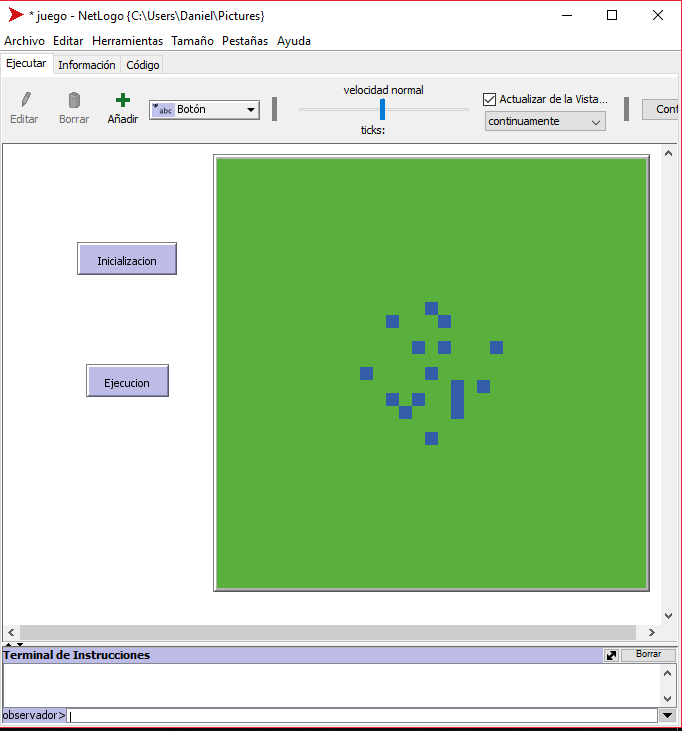
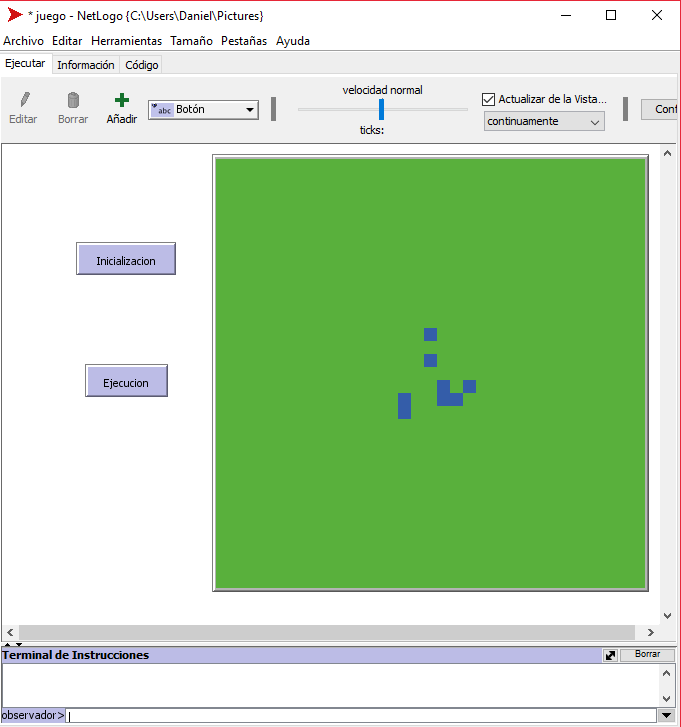
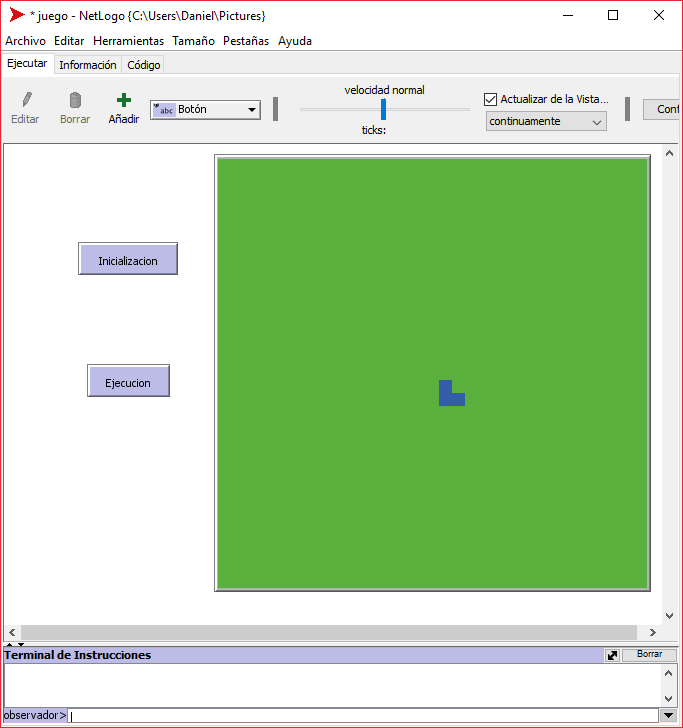
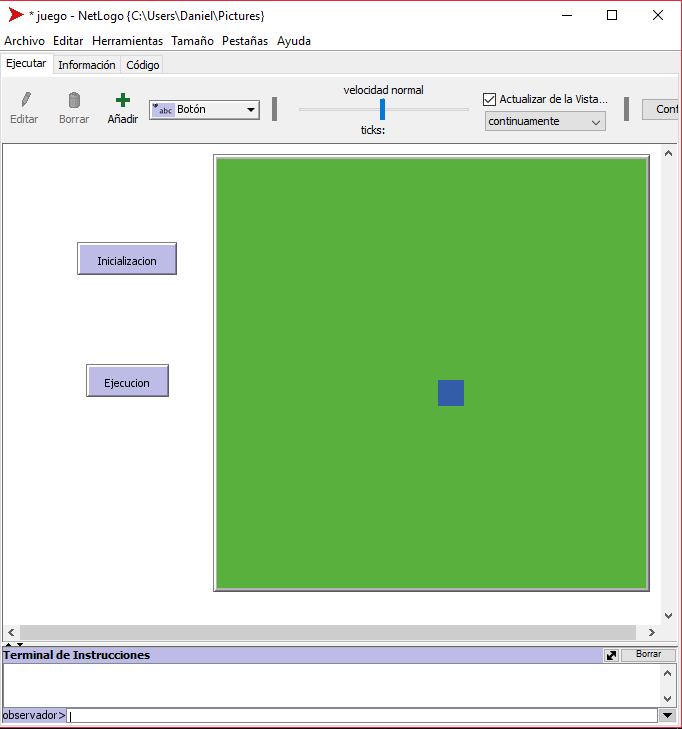